<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#0cd734;color:white;text-align:center;font-size:175%;padding: 10px;"> Introduction</p>
</div>    

<div style="font-family:verdana; word-spacing:1.5px;">
    
<b>Objective</b><br>
    
This problem's primary objective is to analyze the aging process, charge, and discharge cycle of the cell that could help in understanding performance issues of batteries. 
    Also, we need to isolate instances of anomalies for different cells and their different cycles, which might help Engineering team to fix possible issues and improving reliability.
    
<br>   
    
<b>About the Dataset</b>   <br>
     The churn dataset was obtained from the Mahindra, as they are experimenting on making India’s next hydrogen Fuel Cell Electric Vehicle (FCEV). An FCEV is powered by a hydrogen fuel cell, which generates electric power using on-board hydrogen.
They have reached out to Tech Mahindra Data Science team with the measured data for 4 batteries, for helping them in understanding some parameters related to Hydrogen Fuel cell sensors.<br><br>
    The dataset contains following features:
    <ul>
     <li> Voltage_measured: Fuel Cell terminal voltage (Volts)
 <li>   Current_measured: Fuel Cell output current (Amps)
 <li>   Temperature_measured: Fuel Cell temperature (degree C)
 <li>   Current_load: Current measured at load (Amps)
 <li>   Voltage_load: Voltage measured at load (Volts)
 <li>   Time: Time vector for the cycle (seconds)
 <li>   Capacity: Fuel Cell capacity (Ahr) for discharge till 2.7V
 <li> Datetime: the date and time of the start of the cycle
 <li> Ambient_temperature: Temperature in which the fuel cell is stored (degree C)
 <li> Cycle: Charge cycle of the fuel cell

</ul><br>
There are 185721 data points and 12 features.
<br><br>
    
<b>Concept Used :</b><br>
<ul>
    <li> Anomaly Detection - Local Outlier Detection, Isolation Forests
</ul>

    
</div>  

In [190]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tech-mahindra-data/dataset_tech_mahindra.csv


In [191]:
import seaborn as sns
from matplotlib import pyplot as plt

In [192]:
import warnings
warnings.filterwarnings('ignore')

In [193]:
data = pd.read_csv('/kaggle/input/tech-mahindra-data/dataset_tech_mahindra.csv')

In [194]:
data.head()

Unnamed: 0  cycle  ambient_temperature             datetime  capacity  \
0           0      1                   24  2008-04-02 15:25:41  1.856487   
1           1      1                   24  2008-04-02 15:25:41  1.856487   
2           2      1                   24  2008-04-02 15:25:41  1.856487   
3           3      1                   24  2008-04-02 15:25:41  1.856487   
4           4      1                   24  2008-04-02 15:25:41  1.856487   

   voltage_measured  current_measured  temperature_measured  current_load  \
0          4.191492         -0.004902             24.330034       -0.0006   
1          4.190749         -0.001478             24.325993       -0.0006   
2          3.974871         -2.012528             24.389085       -1.9982   
3          3.951717         -2.013979             24.544752       -1.9982   
4          3.934352         -2.011144             24.731385       -1.9982   

   voltage_load    time   cell  
0         0.000   0.000  B0005  
1         4.206  16.781  B0005  
2         3.062  35.703  B0005  
3         3.030  53.781  B0005  
4         3.011  71.922  B0005

In [195]:
data.shape

(185721, 12)

In [196]:
data.columns

Index(['Unnamed: 0', 'cycle', 'ambient_temperature', 'datetime', 'capacity',
       'voltage_measured', 'current_measured', 'temperature_measured',
       'current_load', 'voltage_load', 'time', 'cell'],
      dtype='object')

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185721 entries, 0 to 185720
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            185721 non-null  int64  
 1   cycle                 185721 non-null  int64  
 2   ambient_temperature   185721 non-null  int64  
 3   datetime              185721 non-null  object 
 4   capacity              185721 non-null  float64
 5   voltage_measured      185721 non-null  float64
 6   current_measured      185721 non-null  float64
 7   temperature_measured  185721 non-null  float64
 8   current_load          185721 non-null  float64
 9   voltage_load          185721 non-null  float64
 10  time                  185721 non-null  float64
 11  cell                  185721 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 17.0+ MB


<b> Checking for Null Values in Dataset</b>

In [198]:
data.isna().sum()

Unnamed: 0              0
cycle                   0
ambient_temperature     0
datetime                0
capacity                0
voltage_measured        0
current_measured        0
temperature_measured    0
current_load            0
voltage_load            0
time                    0
cell                    0
dtype: int64

<div style="display:fill;
           border-radius:5px;
           background-color:#b7ff93;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:black;font-size:120%;"> 
    Summary
    </p>
    <p style="padding: 10px;
              color:black;"> 
    <ul>  
    <li>Data contains no null values.
        <br>
        <li>Data contains 7 continuous numerical features.
            <br>
            <li>Data contains 3 discrete numerical features.
                <br>
            <li>Data contains 2 categorical features.
    </ul>
        </p>
    </div>

<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#0cd734;color:white;text-align:center;font-size:175%;padding: 10px;"> Data Preprocessing</p>
</div>    

In [199]:
data['datetime'] = pd.to_datetime(data['datetime'])

<b> Unique values in each column</b> 

In [200]:
for i in data.columns:
    print(i,' : ', data[i].nunique())

Unnamed: 0  :  50285
cycle  :  168
ambient_temperature  :  1
datetime  :  300
capacity  :  636
voltage_measured  :  185721
current_measured  :  185721
temperature_measured  :  185721
current_load  :  21
voltage_load  :  1835
time  :  61903
cell  :  4


<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#0cd734;color:white;text-align:center;font-size:175%;padding: 10px;"> EDA</p>
</div>    

<div style="font-family:verdana; word-spacing:1.5px;">
    <b><p style="text-align:left;font-size:150%;padding: 10px;"> Univariate Analysis</p></b>
</div>    

In [201]:
categorical = ['cycle','current_load','cell']

<b> Countplots for Categorical features</b>

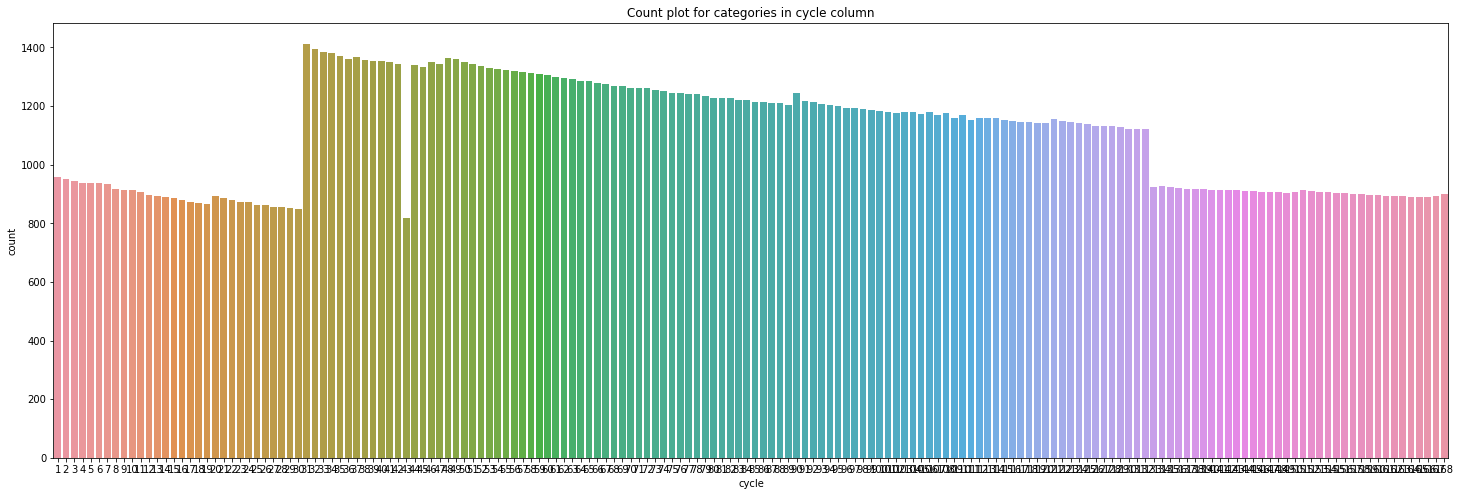

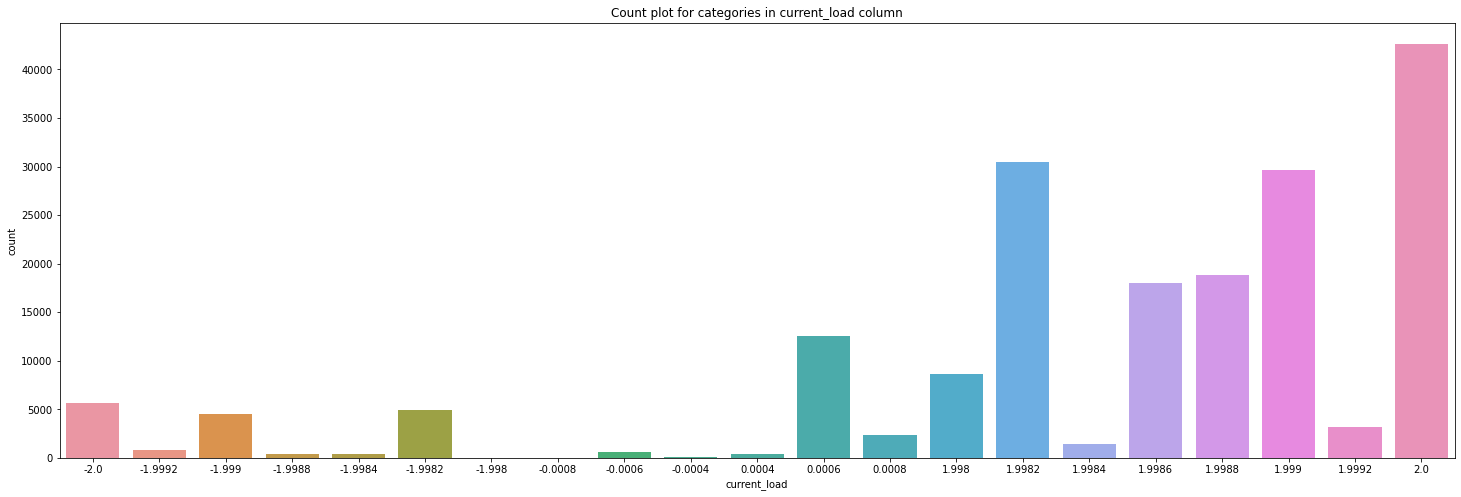

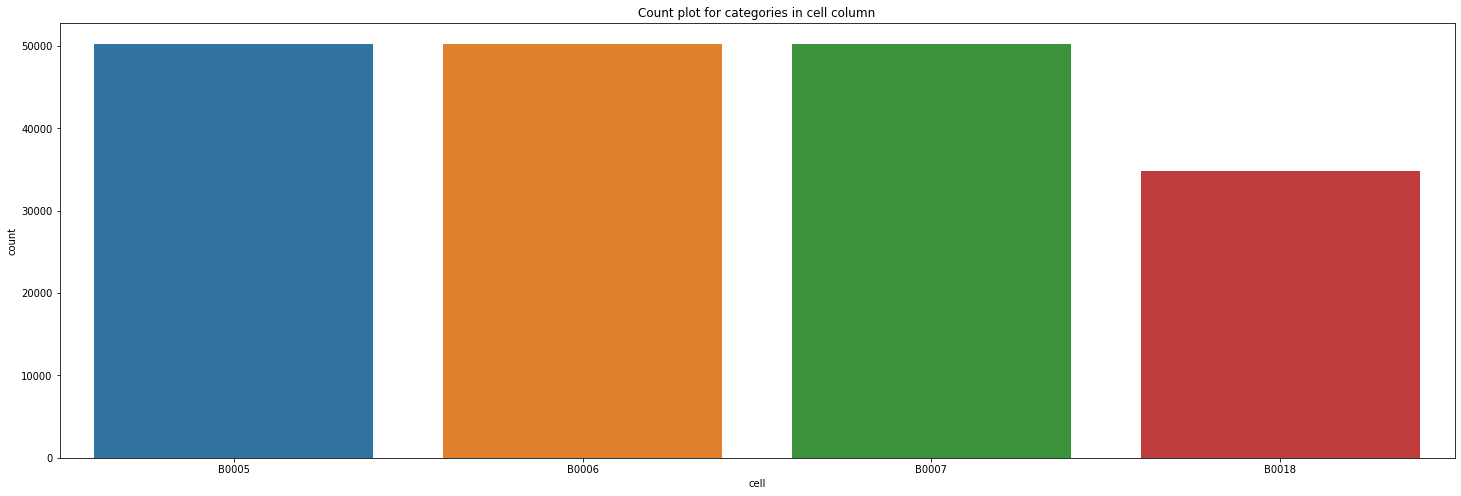

In [202]:
for i in categorical:
    tmp = data[[i]]
    tmp['count'] = 1
    tmp = tmp.groupby(i).sum().reset_index().sort_values(i)
    
    plt.figure(figsize=(25,8))
    sns.barplot(y=tmp['count'],x=tmp[i]).set(title='Count plot for categories in ' + i + ' column')
    plt.show()

<b> Distribution plots for Continuous features</b>

In [203]:
contin_columns = ['capacity', 'voltage_measured', 'current_measured', 'temperature_measured', 'voltage_load', 'time']

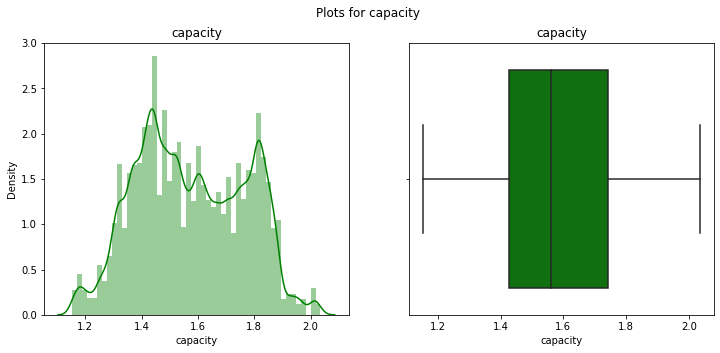

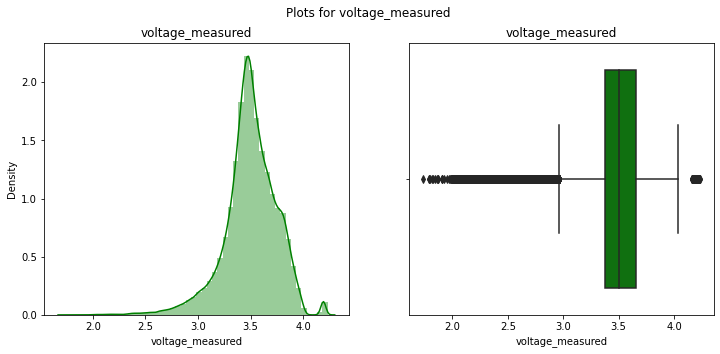

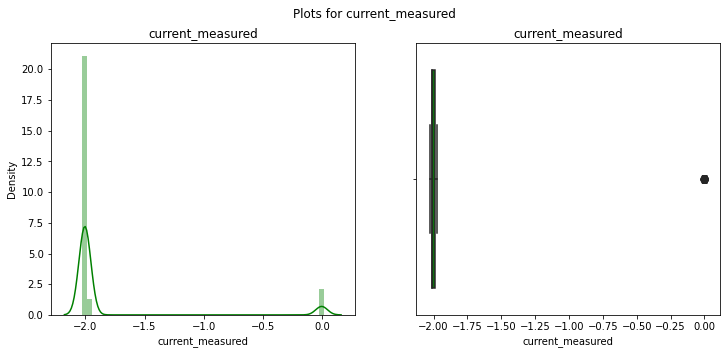

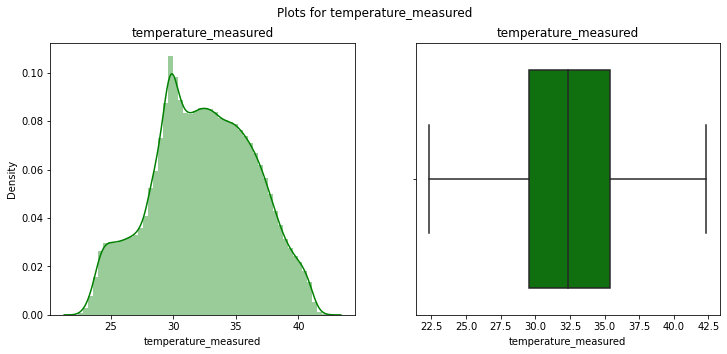

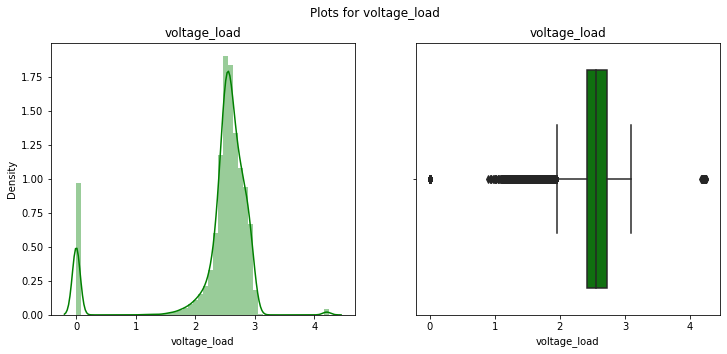

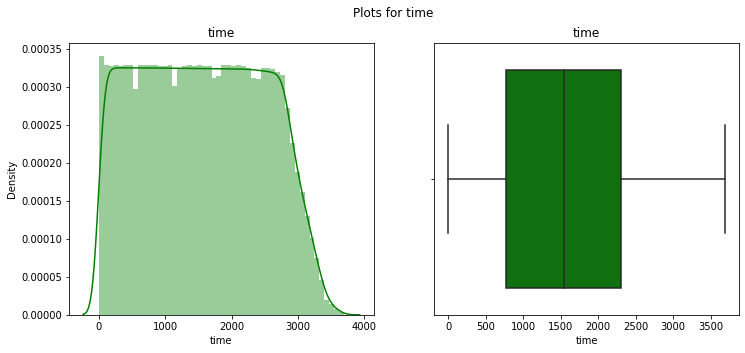

In [204]:
for i in contin_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,5))
    fig.suptitle('Plots for '+i)
    sns.distplot(data[i],bins=50,ax=ax[0],color='green').set(title = i)
    sns.boxplot(data[i],ax=ax[1],color='green').set(title = i)
    plt.show()

In [205]:
categorical,contin_columns

(['cycle', 'current_load', 'cell'],
 ['capacity',
  'voltage_measured',
  'current_measured',
  'temperature_measured',
  'voltage_load',
  'time'])

In [206]:
categorical,contin = (['cycle', 'current_load', 'cell'],
 ['capacity',
  'voltage_measured',
  'current_measured',
  'temperature_measured',
  'voltage_load',
  'time'])

<b>Outlier Detection for voltage_measured column</b>

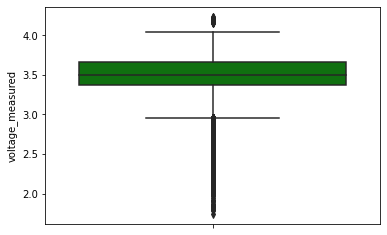

In [207]:
#data['voltage_measured'] = data['voltage_measured'].clip(lower=data['voltage_measured'].quantile(0.05), upper=data['voltage_measured'].quantile(0.95))

sns.boxplot(y=data['voltage_measured'],color='green')
plt.show()

B0005


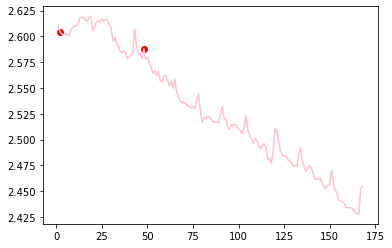



B0006


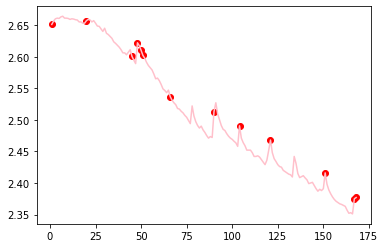



B0007


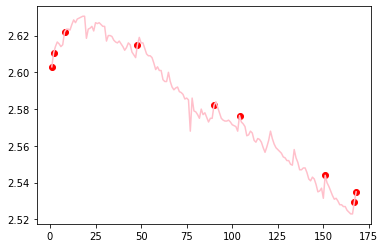



B0018


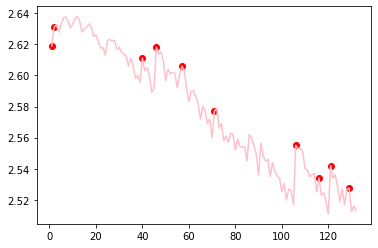

In [208]:
tmp = data.groupby(['cell','cycle']).median().reset_index()
x = tmp['voltage_measured'].diff().fillna(0)
iqr = np.percentile(x,75) - np.percentile(x,25)
outliers_mask = (x > np.percentile(x,75) + 1.5*iqr) | (x < np.percentile(x,25) - 1.5*iqr)
tmp['outlier'] = 0
tmp.loc[outliers_mask.values,'outlier'] = 1
tmp

for i in tmp['cell'].unique():
    print(i)
    tmpw = tmp[tmp['cell'] == i]
    plt.plot(tmpw['cycle'], tmpw[feat], color='pink')
    a = tmpw[tmpw['outlier'] == 1]

    plt.scatter(a['cycle'],a[feat], color='red')
    plt.show()
    print()
    print()

In [209]:

#data['voltage_measured'] = data['voltage_measured'].clip(lower=data['voltage_measured'].quantile(0.05), upper=data['voltage_measured'].quantile(0.95))
#sns.boxplot(data['voltage_measured'],color='green')

<b>Outlier Removal for voltage_load column</b>

In [210]:
data['voltage_load'] = data['voltage_load'].clip(lower=data['voltage_load'].quantile(0.05), upper=data['voltage_load'].quantile(0.95))
sns.boxplot(data['voltage_load'],color='green')
plt.show()

B0005


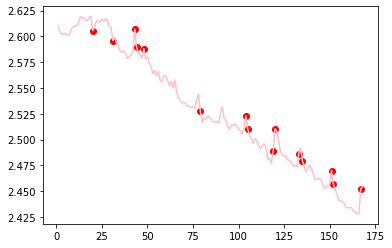



B0006


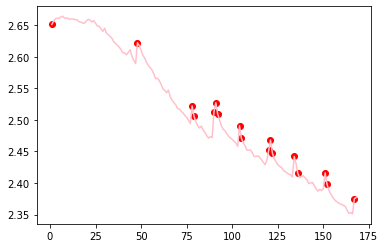



B0007


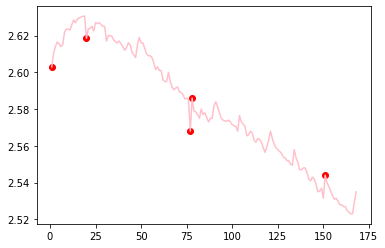



B0018


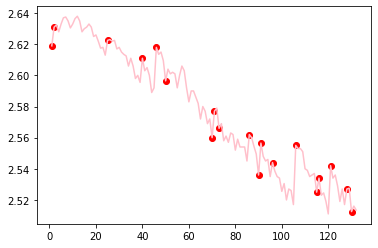

In [211]:
tmp = data.groupby(['cell','cycle']).median().reset_index()
x = tmp['voltage_load'].diff().fillna(0)
iqr = np.percentile(x,75) - np.percentile(x,25)
outliers_mask = (x > np.percentile(x,75) + 1.5*iqr) | (x < np.percentile(x,25) - 1.5*iqr)
tmp['outlier'] = 0
tmp.loc[outliers_mask.values,'outlier'] = 1
tmp

for i in tmp['cell'].unique():
    print(i)
    tmpw = tmp[tmp['cell'] == i]
    plt.plot(tmpw['cycle'], tmpw[feat], color='pink')
    a = tmpw[tmpw['outlier'] == 1]

    plt.scatter(a['cycle'],a[feat], color='red')
    plt.show()
    print()
    print()

<div style="display:fill;
           border-radius:5px;
           background-color:#b7ff93;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:black;font-size:120%;"> 
    Summary
    </p>
    <p style="padding: 10px;
              color:black;"> 
    <ul>  
    <li>Data contains no null values.
        <br>
        <li>Data contains 7 continuous numerical features.
            <br>
            <li>Data contains 3 discrete numerical features.
                <br>
            <li>Data contains 2 categorical features.
            <br>
        <li> There appear outliers in voltage_load,voltage_measured columns, these are fixed using 95th percentile IQR.
        <br>
       <li> IQR works great for manual outlier detection.     
    </ul>
        </p>
    </div>

<div style="font-family:verdana; word-spacing:1.5px;">
    <b><p style="text-align:left;font-size:150%;padding: 10px;"> Multivariate Analysis</p></b>
</div>    

<b> Change in continous features with datetime column</b>

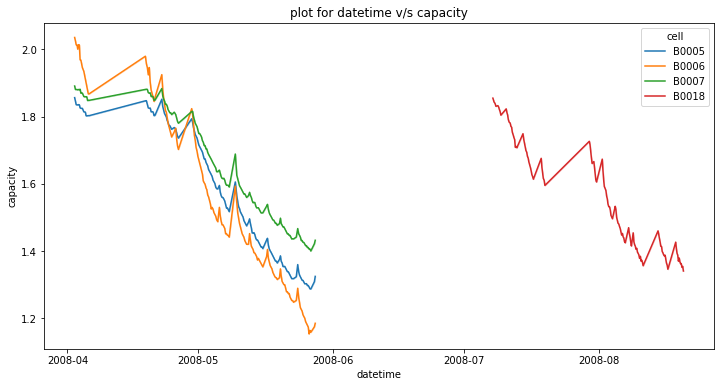

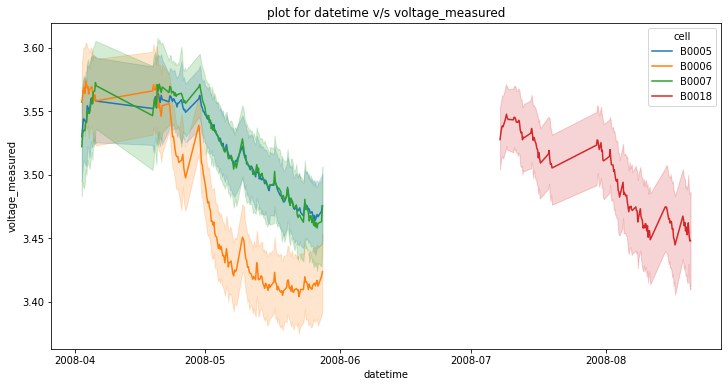

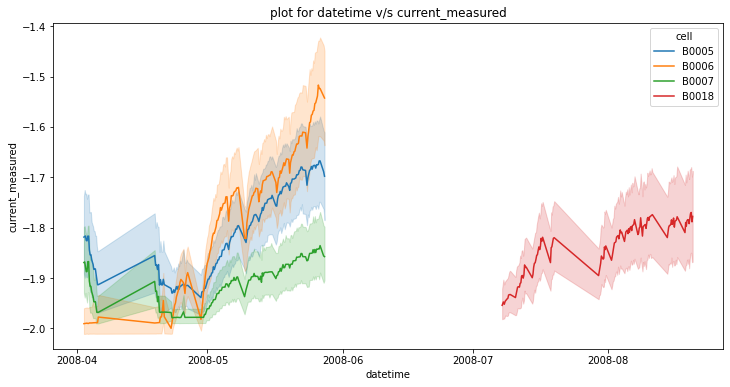

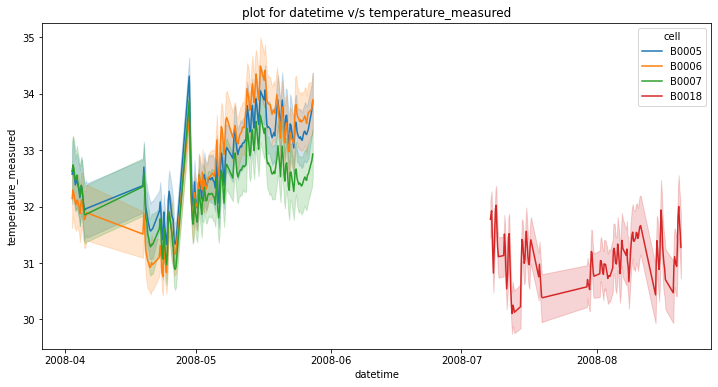

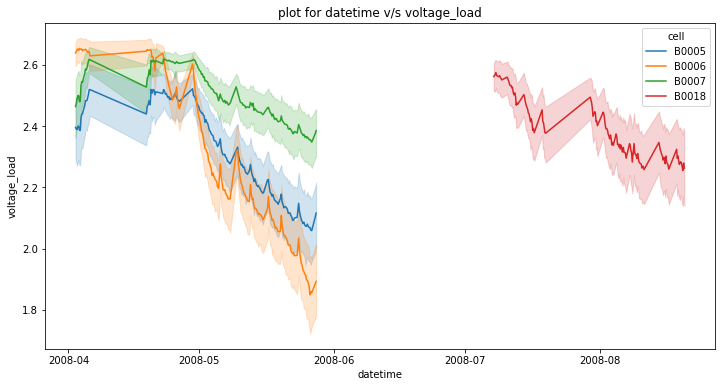

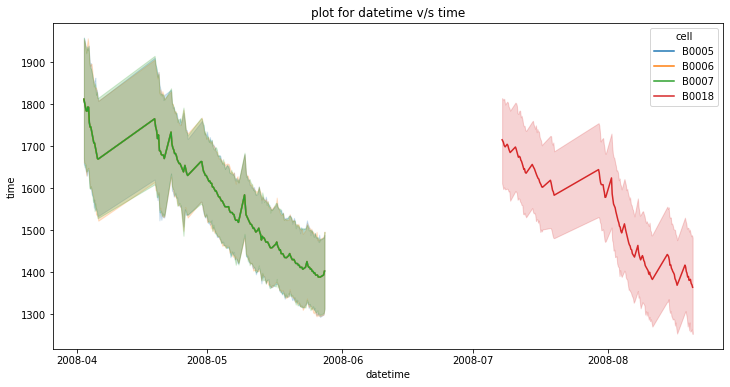

In [212]:
for i in contin_columns:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=data,x='datetime',y=i,hue='cell').set(title="plot for datetime v/s "+i)
    plt.show()

<div style="display:fill;
           border-radius:5px;
           background-color:#b7ff93;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:black;font-size:120%;"> 
    Summary
    </p>
    <p style="padding: 10px;
              color:black;"> 
    <ul>  
    <li>In above plots for time,capacity,voltage_measured the graph for all 4 battery looks quite similar, which indicates that behaviour of battery remain similiar in all these aspects.
        <br>
        <li>AVG Capacity seems to be decreasing with time.
            <br>
            <li>AVG Voltage measured from battery is also decreasing with time.
                <br>
                <li>AVG Current measured from battery is increasing with time.
                    <br>
          <li>AVG Temprature measured from battery is decreasing with time.
                    <br>
              <li>AVG cycle discharge time from battery is increasing with time.
                    <br>
        <li>B0007 Battery seems to be having highest capacity, while B0006 has least capacity, than others batteries after its halflife.
            <br>
            <li>B0007 Battery seems to be having highest voltage meeasure, while B0006 has least voltage meeasure, than others batteries after its halflife.
                <br>
            <li>B0006 Battery seems to be having highest voltage measure, while B0007 has least voltage meeasure, than others batteries after its halflife.
                <br>
            <li>B0018 Battery seems to be having best tradeoff between current and voltage(as both) also it has got least temprature readings which tells that battery isn't having issues of overheating.
    </ul>
        </p>
    </div>

<b> Difference in continuous features for first cycle vs last cycle</b> 

Plots for  B0005


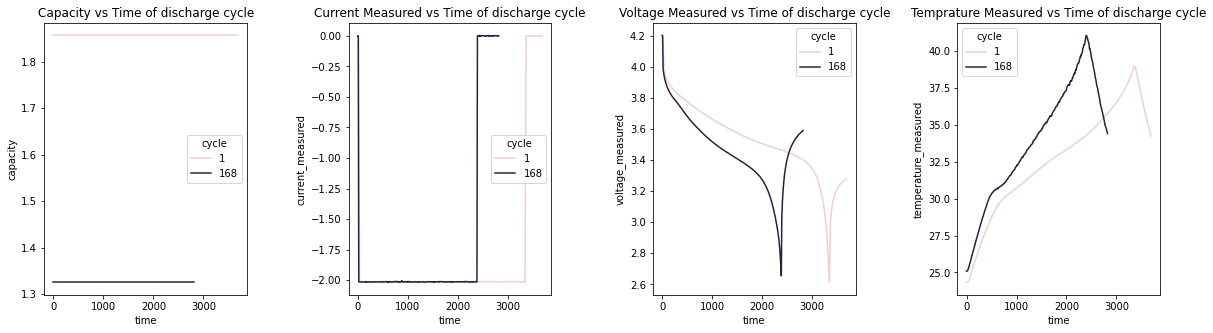

Plots for  B0006


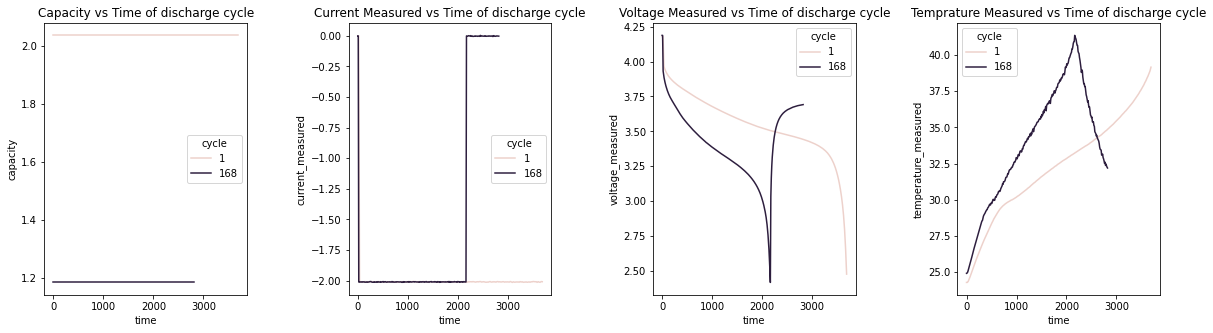

Plots for  B0007


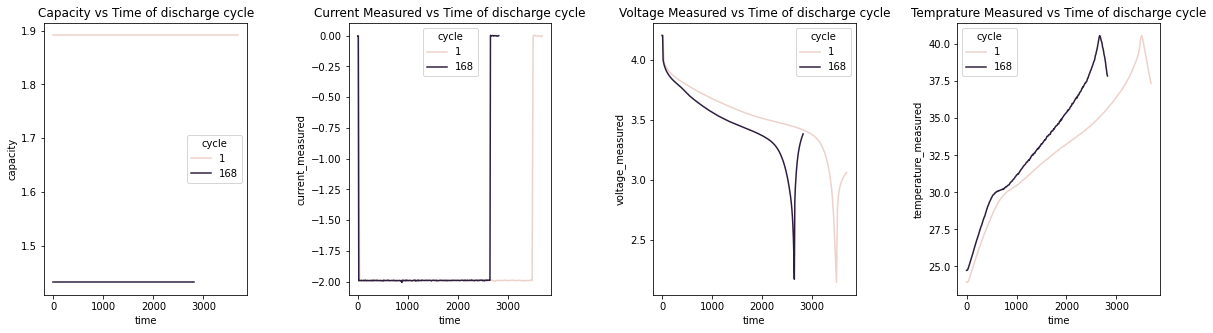

Plots for  B0018


In [213]:
for i in data['cell'].unique():
    tmp = data[data['cell'] == i]
    tmp = tmp.sort_values('cycle').reset_index(drop=True)
    top_cycle = tmp['cycle'].min()
    bottom_cycle = tmp['cycle'].max()
    tmp = pd.concat([tmp[tmp['cycle']==top_cycle], tmp[tmp['cycle']==bottom_cycle ]],axis=0)
    print("Plots for ",i)
    fig, ax = plt.subplots(1,4,figsize=(20,5))
    fig.subplots_adjust(wspace=.5)
    
    sns.lineplot(data=tmp,x='time',y='capacity',hue='cycle',ax=ax[0])
    sns.lineplot(data=tmp,x='time',y='current_measured',hue='cycle',ax=ax[1])
    sns.lineplot(data=tmp,x='time',y='voltage_measured',hue='cycle',ax=ax[2])
    sns.lineplot(data=tmp,x='time',y='temperature_measured',hue='cycle',ax=ax[3])
    ax[0].title.set_text('Capacity vs Time of discharge cycle')
    ax[1].title.set_text('Current Measured vs Time of discharge cycle')
    ax[2].title.set_text('Voltage Measured vs Time of discharge cycle')
    ax[3].title.set_text('Temprature Measured vs Time of discharge cycle')
    plt.show()

<div style="display:fill;
           border-radius:5px;
           background-color:#b7ff93;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:black;font-size:120%;"> 
    Summary
    </p>
    <p style="padding: 10px;
              color:black;"> 
    <ul>  
        <li>Time of cycle for latter cycles is hiigh as compared to first cycle.
                <br>
        <li>Capacity seems to be decreasing with time with increase in time of cycle.
            <br>
                <li>Levels of Current measured from battery is not changing with increase in time of cycle.
                    <br>
        <li>Discharge time for batteries increase with time.
                <br>
          <li>Levels of voltage measured from battery is not changing with increase in time of cycle.
                    <br>
              <li>AVG cycle discharge time from battery is increasing with time.
                    <br>
        <li>For Batteries B0005 and B0006 temperature peak is increasing with time, while for batteries B0007 and B0018 temperature peak is not changing with time.
    </ul>
        </p>
    </div>

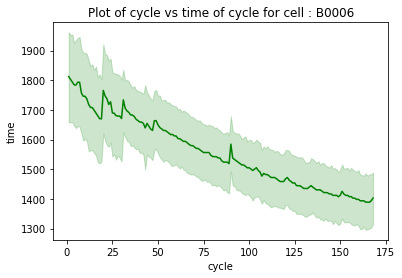

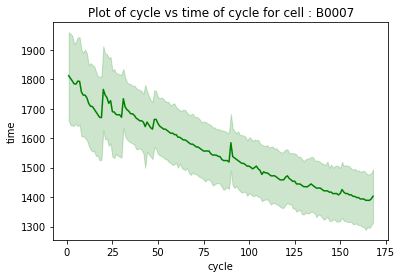

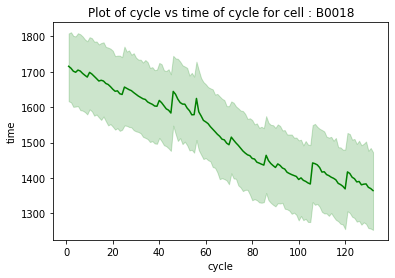

In [214]:
for i in data['cell'].unique():
    tmp = data[data['cell']==i]
    sns.lineplot(x=tmp['cycle'],y=tmp['time'],color='green').set(title="Plot of cycle vs time of cycle for cell : "+i)
    plt.show()

<b> Changes in mean of continous features with cycles</b>

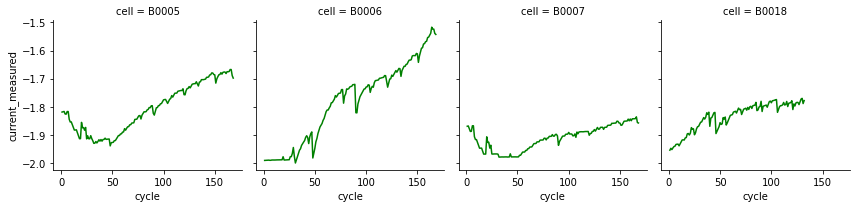

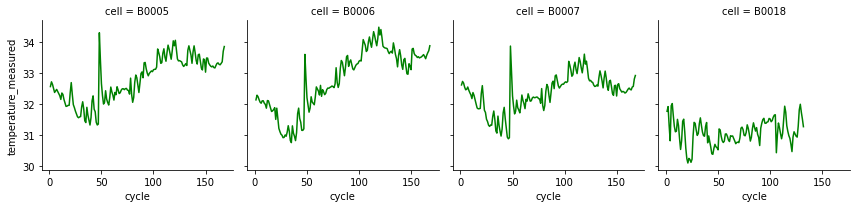

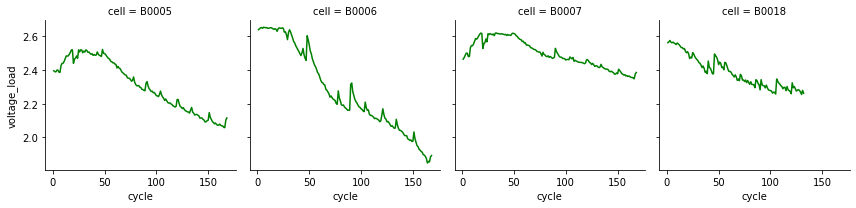

In [215]:

tmp = data.groupby(['cell','cycle']).mean().reset_index()

for i in contin_columns:
    g = sns.FacetGrid(tmp, col="cell")
    g.map_dataframe(sns.lineplot, x='cycle',y=i,color='green')
    plt.show()




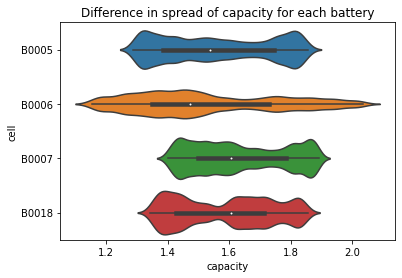

In [216]:
sns.violinplot(data=data,x='capacity',y='cell',  orient="h").set(title="Difference in spread of capacity for each battery")
plt.show()

<div style="display:fill;
           border-radius:5px;
           background-color:#b7ff93;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">    
    <p style="padding: 10px;
              color:black;"> 
    <ul>  
        <li>B0006 has a very broad range of capacities, while B0007 has reached least capacity. 
                <br>
    </ul>
        </p>
    </div>

<b> Analysing data using scatterplot in multiple dimensions</b>

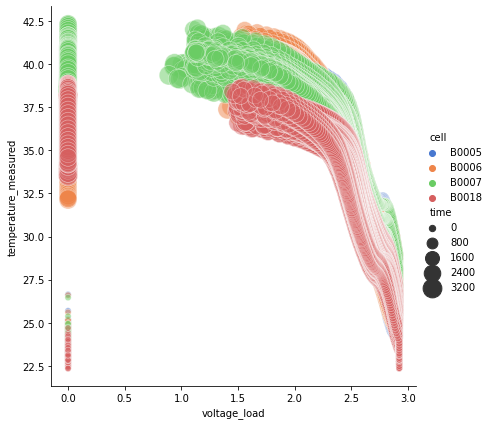

In [217]:


sns.relplot(x='voltage_load', y='temperature_measured', hue='cell', size='time',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)


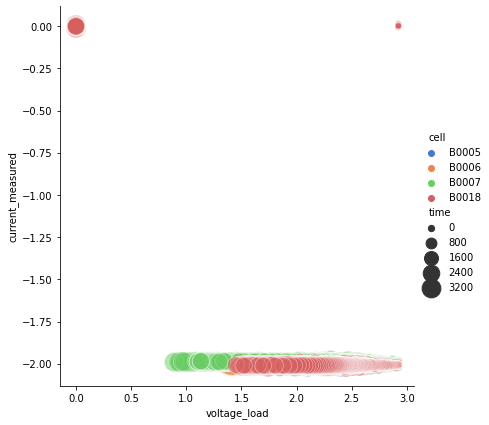

In [218]:


sns.relplot(x='voltage_load', y='current_measured', hue='cell', size='time',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

<div style="display:fill;
           border-radius:5px;
           background-color:#b7ff93;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">    
    <p style="padding: 10px;
              color:black;"> 
    <ul>  
        <li>There is an anomaly in top-left and top-right of the graph, they seem to be some rare happening cases.
                <br>
    </ul>
        </p>
    </div>

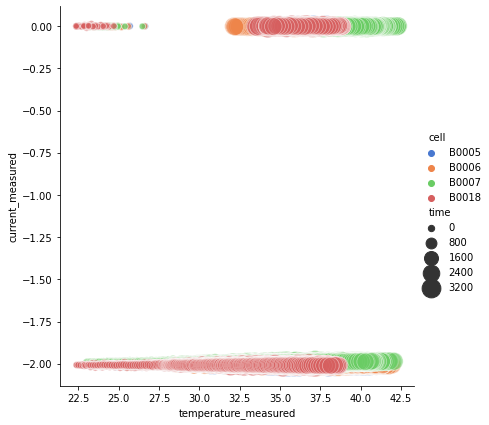

In [219]:


sns.relplot(x='temperature_measured', y='current_measured', hue='cell', size='time',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

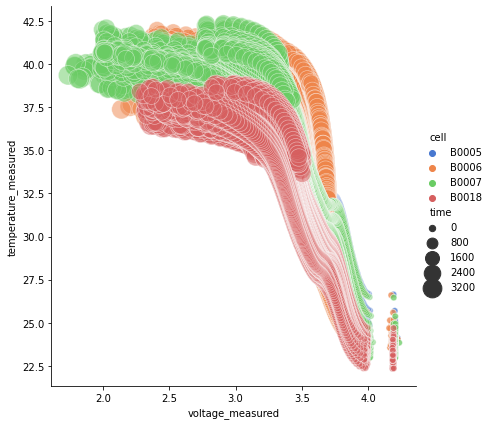

In [220]:


sns.relplot(x='voltage_measured', y='temperature_measured', hue='cell', size='time',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

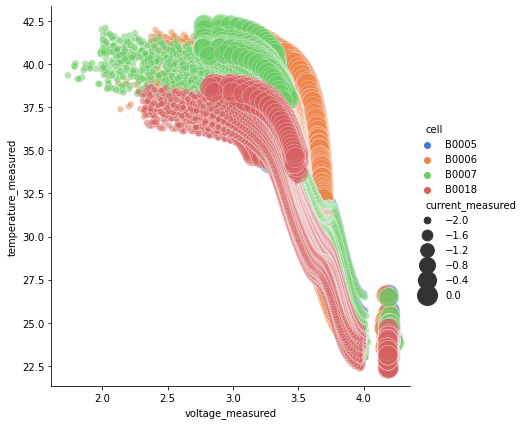

In [221]:


sns.relplot(x='voltage_measured', y='temperature_measured', hue='cell', size='current_measured',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

<div style="display:fill;
           border-radius:5px;
           background-color:#b7ff93;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">    
    <p style="padding: 10px;
              color:black;"> 
    <ul>  
        <li>There is an anomaly in bottom-right of the graph, they seem to be some rare happening cases.
                <br>
    </ul>
        </p>
    </div>

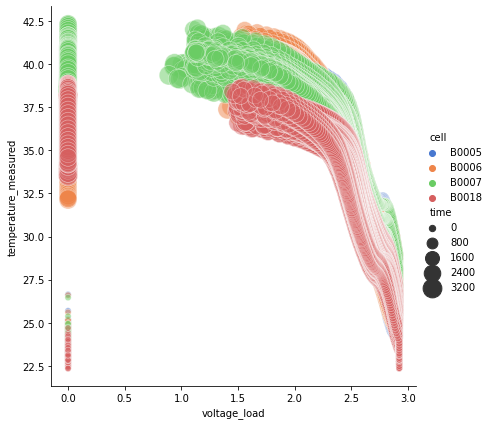

In [222]:

sns.relplot(x='voltage_load', y='temperature_measured', hue='cell', size='time',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

<div style="display:fill;
           border-radius:5px;
           background-color:#b7ff93;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">    
    <p style="padding: 10px;
              color:black;"> 
    <ul>  
        <li>There is an anamoly in bottom-left of the graph, they seem to be some rare happening cases.
                <br>
    </ul>
        </p>
    </div>

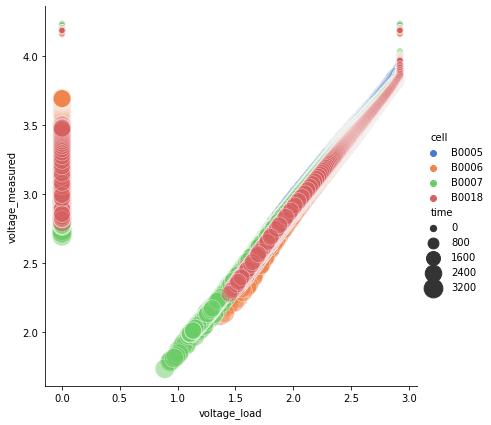

In [223]:


sns.relplot(x='voltage_load', y='voltage_measured', hue='cell', size='time',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

<div style="display:fill;
           border-radius:5px;
           background-color:#b7ff93;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">    
    <p style="padding: 10px;
              color:black;"> 
    <ul>  
        <li>There is an anamoly in top-left of the graph, they seem to be some rare happening cases.
                <br>
    </ul>
        </p>
    </div>

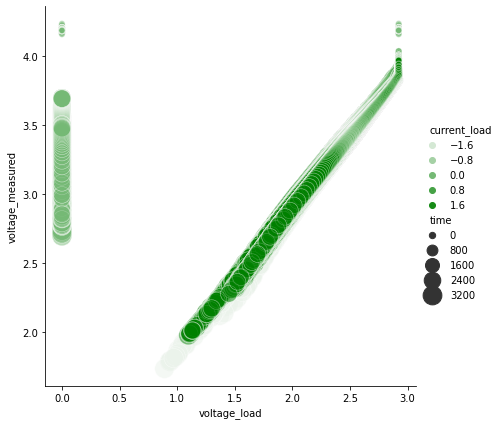

In [224]:

sns.relplot(x='voltage_load', y='voltage_measured', hue='current_load', size='time',
            sizes=(40, 400), alpha=.5, palette="light:g",
            height=6, data=data)

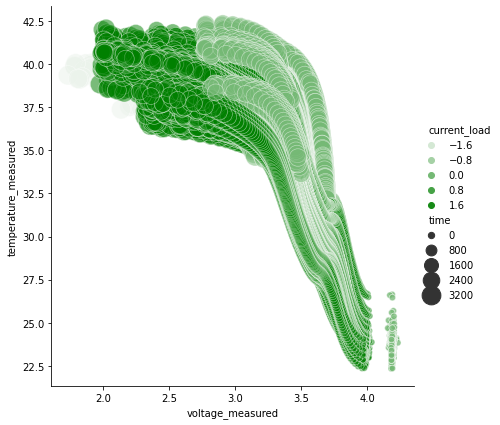

In [225]:


sns.relplot(x='voltage_measured', y='temperature_measured', hue='current_load', size='time',
            sizes=(40, 400), alpha=.5, palette="light:g",
            height=6, data=data)

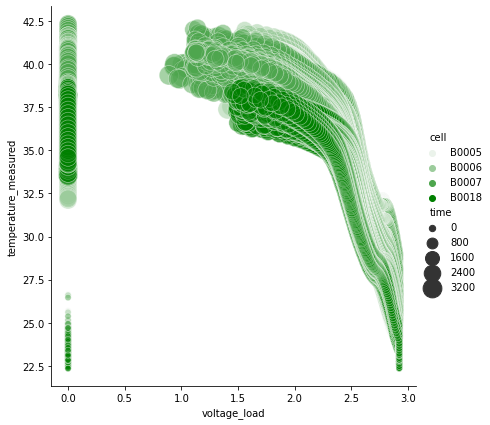

In [226]:
#sns.scatterplot(x=data['time'],y=data['capacity'],hue=data['cell'])

sns.relplot(x='voltage_load', y='temperature_measured', hue='cell', size='time',
            sizes=(40, 400), alpha=.5,  palette="light:g",
            height=6, data=data)

<AxesSubplot:xlabel='temperature_measured', ylabel='current_measured'>

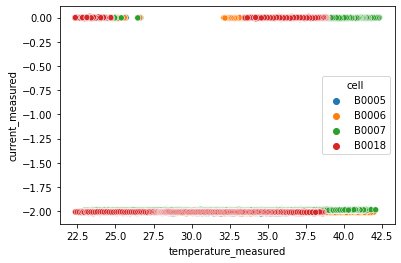

In [227]:
sns.scatterplot(x=data['temperature_measured'],y=data['current_measured'],hue=data['cell'])

<AxesSubplot:xlabel='current_measured', ylabel='voltage_measured'>

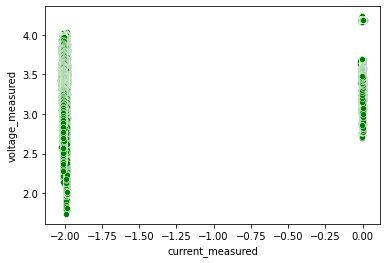

In [228]:
sns.scatterplot(x=data['current_measured'],y=data['voltage_measured'],color='green')

In [229]:
#sns.scatterplot(x=data['time'],y=data['capacity'],hue=data['cell'])

tmp = data.copy()
tmp = tmp[tmp['voltage_load'] > 1]
sns.relplot(x='time', y='voltage_measured', hue='cell', size='capacity',
            sizes=(40, 400), alpha=.5,
            height=6, data=tmp)

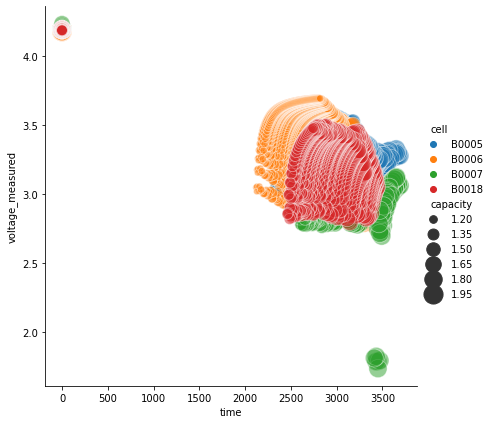

In [230]:
#sns.scatterplot(x=data['time'],y=data['capacity'],hue=data['cell'])

tmp = data.copy()
tmp = tmp[tmp['voltage_load'] < 1]
sns.relplot(x='time', y='voltage_measured', hue='cell', size='capacity',
            sizes=(40, 400), alpha=.5,
            height=6, data=tmp)

<div style="display:fill;
           border-radius:5px;
           background-color:#b7ff93;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">    
    <p style="padding: 10px;
              color:black;"> 
    <ul>  
        <li>There is an anamoly in top-left and bottom-right of the graph, they seem to be some rare happening cases.
                <br>
    </ul>
        </p>
    </div>

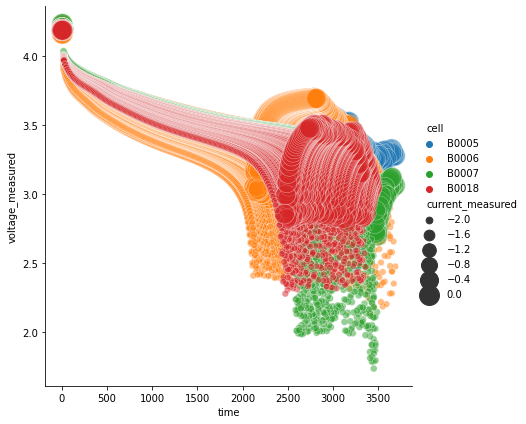

In [231]:
sns.relplot(x='time', y='voltage_measured', hue='cell', size='current_measured',
            sizes=(40, 400), alpha=.5,
            height=6, data=data)

<div style="display:fill;
           border-radius:5px;
           background-color:#b7ff93;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">    
    <p style="padding: 10px;
              color:black;"> 
    <ul>  
        <li>Voltage seems to be dropping alot in later cyclees for B0007.
                <br>
    </ul>
        </p>
    </div>

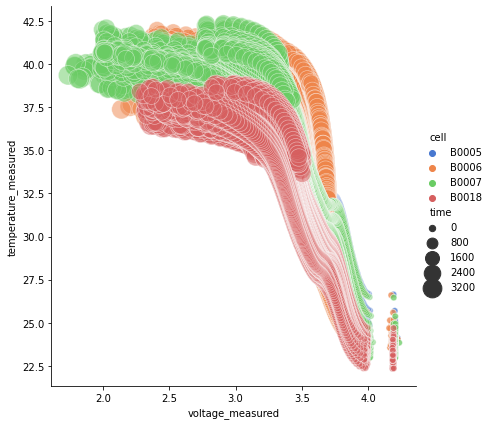

In [232]:
sns.relplot(x='voltage_measured', y='temperature_measured', hue='cell', size='time',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#0cd734;color:white;text-align:center;font-size:175%;padding: 10px;"> Anomaly Detection using Unsupervised Algorithms</p>
</div>    

In [233]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [234]:
data

Unnamed: 0  cycle  ambient_temperature            datetime  capacity  \
0                0      1                   24 2008-04-02 15:25:41  1.856487   
1                1      1                   24 2008-04-02 15:25:41  1.856487   
2                2      1                   24 2008-04-02 15:25:41  1.856487   
3                3      1                   24 2008-04-02 15:25:41  1.856487   
4                4      1                   24 2008-04-02 15:25:41  1.856487   
...            ...    ...                  ...                 ...       ...   
185716       34861    132                   24 2008-08-20 08:37:19  1.341051   
185717       34862    132                   24 2008-08-20 08:37:19  1.341051   
185718       34863    132                   24 2008-08-20 08:37:19  1.341051   
185719       34864    132                   24 2008-08-20 08:37:19  1.341051   
185720       34865    132                   24 2008-08-20 08:37:19  1.341051   

        voltage_measured  current_measured  temperature_measured  \
0               4.191492         -0.004902             24.330034   
1               4.190749         -0.001478             24.325993   
2               3.974871         -2.012528             24.389085   
3               3.951717         -2.013979             24.544752   
4               3.934352         -2.011144             24.731385   
...                  ...               ...                   ...   
185716          3.443760         -0.002426             35.383979   
185717          3.453271         -0.000981             35.179732   
185718          3.461963          0.000209             34.977000   
185719          3.469907          0.001516             34.785943   
185720          3.477277         -0.001940             34.581660   

        current_load  voltage_load      time   cell  
0            -0.0006         0.000     0.000  B0005  
1            -0.0006         2.923    16.781  B0005  
2            -1.9982         2.923    35.703  B0005  
3            -1.9982         2.923    53.781  B0005  
4            -1.9982         2.923    71.922  B0005  
...              ...           ...       ...    ...  
185716        0.0006         0.000  2686.359  B0018  
185717        0.0006         0.000  2700.546  B0018  
185718        0.0006         0.000  2714.640  B0018  
185719        0.0006         0.000  2728.750  B0018  
185720        0.0006         0.000  2742.843  B0018  

[185721 rows x 12 columns]

In [235]:
data['mins'] = data['datetime'].dt.minute

In [236]:
data['hours'] = data['datetime'].dt.hour

In [237]:
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day

<b> Isolation forest applied on mean time of cycle (after removing trend)</b>

Plots for  B0005


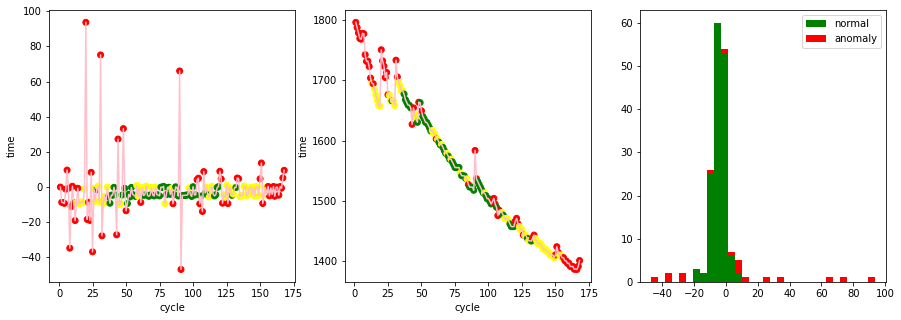



Plots for  B0006


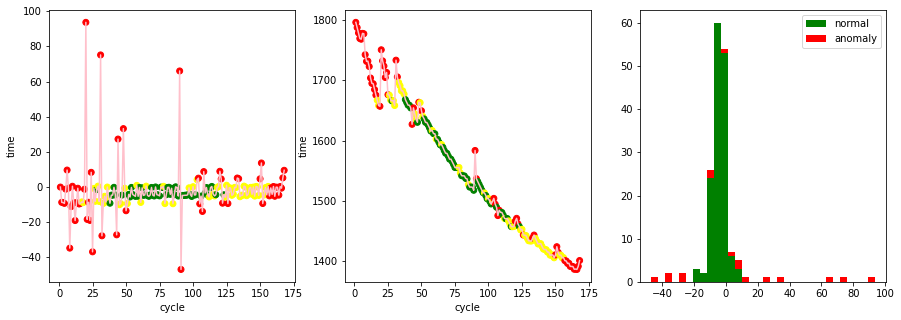



Plots for  B0007


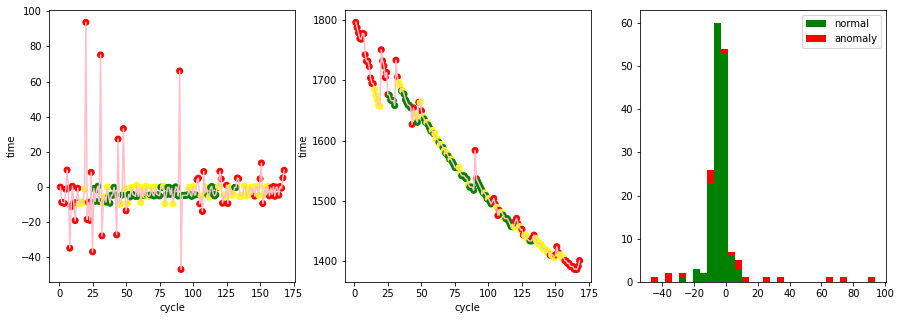



Plots for  B0018


In [259]:
for i in data['cell'].unique():
    print('Plots for ',i)
    feat = 'time'
    tmp = data[data['cell'] ==i]
    
    hmp = tmp.groupby('cycle').median().reset_index()
    
    cc = hmp[['cycle',feat]]
    feat1 = feat + '_org'
    cc[feat1] = cc[feat]
    cc[feat] = cc[feat].diff().fillna(0)
    min_max_scaler = StandardScaler()
    np_scaled = min_max_scaler.fit_transform(cc)
    dat = pd.DataFrame(np_scaled)
    model =  IsolationForest(contamination=0.1,n_estimators=100)
    model.fit(dat)
    
    cc['anomaly'] = pd.Series(model.predict(dat))
    cc['score'] = pd.Series(model.decision_function(dat))
 
    cc['score'] = pd.qcut(cc['score'], 3,[3,2,1])
    

    cc['anomaly'] = cc['anomaly'].map( {1: 0, -1: 1} )
 

    fig, ax = plt.subplots(1,3,figsize=(15,5))

    ax[0].plot(cc['cycle'], cc[feat], color='pink')
    ax[0].scatter(cc['cycle'],cc[feat],c=cc['score'].map(colors))
    
    ax[0].set_xlabel('cycle')
    ax[0].set_ylabel(feat)
 
    a = cc.loc[cc['anomaly'] == 0, feat]
    b = cc.loc[cc['anomaly'] == 1, feat]
    
    ax[1].plot(cc['cycle'], cc[feat1], color='pink')
    colors = {3:'red',2:'yellow',1:'green'}
    ax[1].scatter(cc['cycle'],cc[feat1],c=cc['score'].map(colors))
    ax[1].set_xlabel('cycle')
    ax[1].set_ylabel(feat)
    
    ax[2].hist([a,b], bins=32, stacked=True, color=['green', 'red'], label = ['normal', 'anomaly'])
    
    plt.legend()
    plt.show()
    print()
    print()

<b> Elliptic Envelope applied on mean time of cycle (after removing trend)</b>

Plots for  B0005




Plots for  B0006


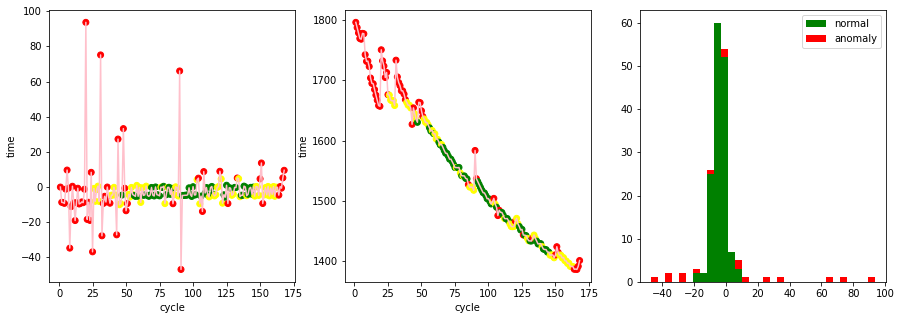



Plots for  B0007


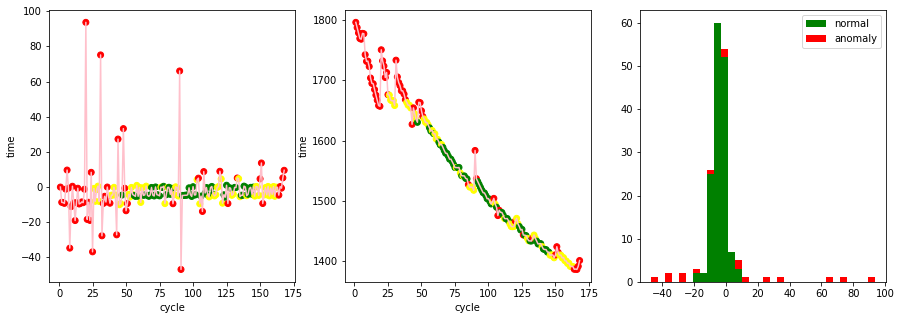



Plots for  B0018


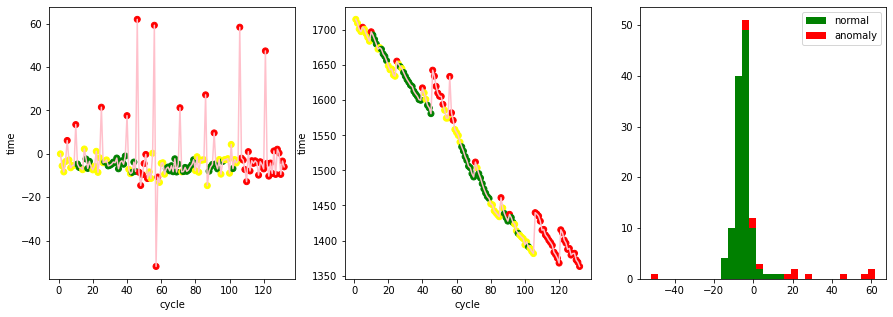

In [260]:
for i in data['cell'].unique():
    print('Plots for ',i)
    feat = 'time'
    tmp = data[data['cell'] ==i]
    hmp = tmp.groupby('cycle').median().reset_index()
    cc = hmp[['cycle',feat]]
    feat1 = feat + '_org'
    cc[feat1] = cc[feat]
    cc[feat] = cc[feat].diff().fillna(0)
    min_max_scaler = StandardScaler()
    np_scaled = min_max_scaler.fit_transform(cc)
    dat = pd.DataFrame(np_scaled)
    model =  EllipticEnvelope(contamination=0.1)
    model.fit(dat)
    
    cc['anomaly'] = pd.Series(model.predict(dat))
    cc['score'] = pd.Series(model.decision_function(dat))
 
    cc['score'] = pd.qcut(cc['score'], 3,[3,2,1])
    

    cc['anomaly'] = cc['anomaly'].map( {1: 0, -1: 1} )
 

    fig, ax = plt.subplots(1,3,figsize=(15,5))

    ax[0].plot(cc['cycle'], cc[feat], color='pink')
    ax[0].scatter(cc['cycle'],cc[feat],c=cc['score'].map(colors))
    
    ax[0].set_xlabel('cycle')
    ax[0].set_ylabel(feat)
 
    a = cc.loc[cc['anomaly'] == 0, feat]
    b = cc.loc[cc['anomaly'] == 1, feat]
    
    ax[1].plot(cc['cycle'], cc[feat1], color='pink')
    colors = {3:'red',2:'yellow',1:'green'}
    ax[1].scatter(cc['cycle'],cc[feat1],c=cc['score'].map(colors))
    ax[1].set_xlabel('cycle')
    ax[1].set_ylabel(feat)
    
    ax[2].hist([a,b], bins=32, stacked=True, color=['green', 'red'], label = ['normal', 'anomaly'])
    
    plt.legend()
    plt.show()
    print()
    print()

<b> Local Outlier Factor applied on mean time of cycle (after removing trend)</b>

Plots for  B0005


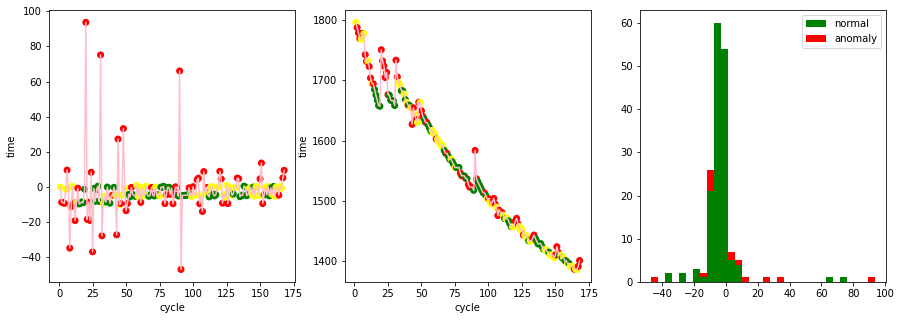



Plots for  B0006


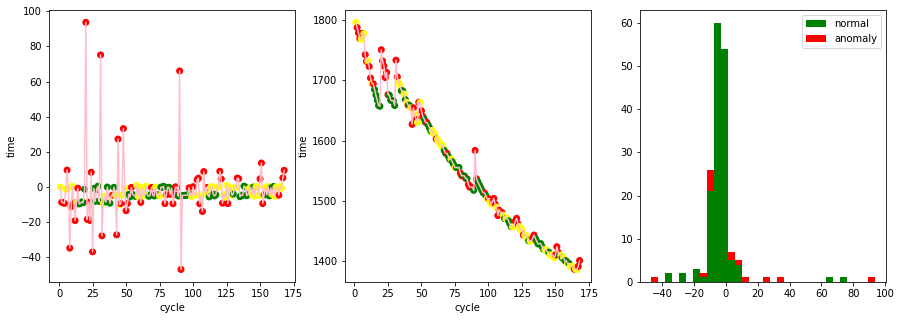



Plots for  B0007


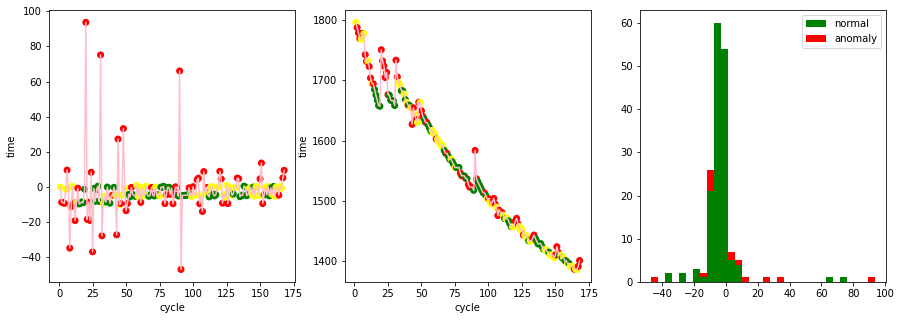



Plots for  B0018


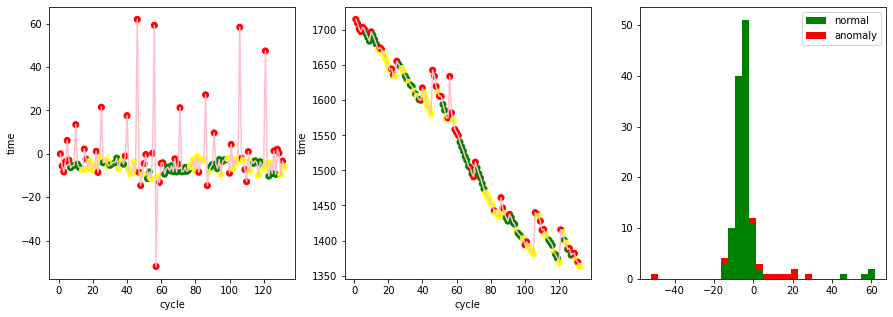

In [261]:
for i in data['cell'].unique():
    print('Plots for ',i)
    feat = 'time'
    tmp = data[data['cell'] ==i]
    hmp = tmp.groupby('cycle').median().reset_index()
    cc = hmp[['cycle',feat]]
    feat1 = feat + '_org'
    cc[feat1] = cc[feat]
    cc[feat] = cc[feat].diff().fillna(0)
    min_max_scaler = StandardScaler()
    np_scaled = min_max_scaler.fit_transform(cc)
    dat = pd.DataFrame(np_scaled)
    model =  LocalOutlierFactor(n_neighbors=5,novelty=True)
    model.fit(dat)

    cc['anomaly'] = pd.Series(model.predict(dat))
    cc['score'] = pd.Series(model.decision_function(dat))
 
    cc['score'] = pd.qcut(cc['score'], 3,[3,2,1])
    

    cc['anomaly'] = cc['anomaly'].map( {1: 0, -1: 1} )
 

    fig, ax = plt.subplots(1,3,figsize=(15,5))

    ax[0].plot(cc['cycle'], cc[feat], color='pink')
    ax[0].scatter(cc['cycle'],cc[feat],c=cc['score'].map(colors))
    
    ax[0].set_xlabel('cycle')
    ax[0].set_ylabel(feat)
 
    a = cc.loc[cc['anomaly'] == 0, feat]
    b = cc.loc[cc['anomaly'] == 1, feat]
    
    ax[1].plot(cc['cycle'], cc[feat1], color='pink')
    colors = {3:'red',2:'yellow',1:'green'}
    ax[1].scatter(cc['cycle'],cc[feat1],c=cc['score'].map(colors))
    ax[1].set_xlabel('cycle')
    ax[1].set_ylabel(feat)
    
    
    ax[2].hist([a,b], bins=32, stacked=True, color=['green', 'red'], label = ['normal', 'anomaly'])
    
    plt.legend()
    plt.show()
    print()
    print()

<b> Isolation forest applied on mean voltage_measured thorough cycles (after removing trend)</b>

Plots for  B0005


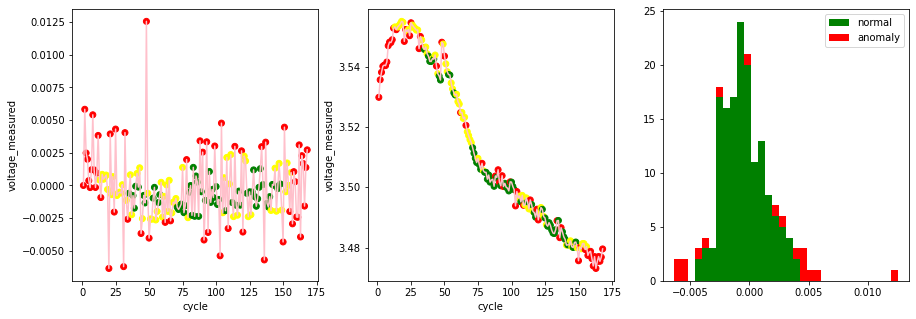



Plots for  B0006




Plots for  B0007


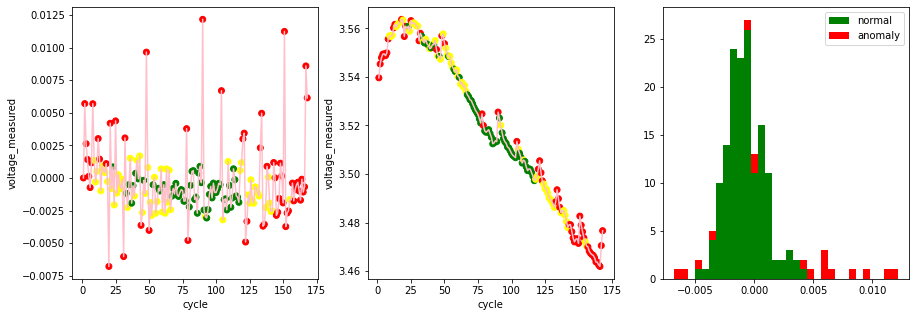



Plots for  B0018


In [262]:
for i in data['cell'].unique():
    print('Plots for ',i)
    feat = 'voltage_measured'
    tmp = data[data['cell'] ==i]
    hmp = tmp.groupby('cycle').median().reset_index()
    cc = hmp[['cycle',feat]]
    feat1 = feat + '_org'
    cc[feat1] = cc[feat]
    cc[feat] = cc[feat].diff().fillna(0)
    min_max_scaler = StandardScaler()
    np_scaled = min_max_scaler.fit_transform(cc)
    dat = pd.DataFrame(np_scaled)
    model =  IsolationForest(contamination=0.1)
    model.fit(dat)
    
    cc['anomaly'] = pd.Series(model.predict(dat))
    cc['score'] = pd.Series(model.decision_function(dat))
 
    cc['score'] = pd.qcut(cc['score'], 3,[3,2,1])
    

    cc['anomaly'] = cc['anomaly'].map( {1: 0, -1: 1} )
 

    fig, ax = plt.subplots(1,3,figsize=(15,5))

    ax[0].plot(cc['cycle'], cc[feat], color='pink')
    ax[0].scatter(cc['cycle'],cc[feat],c=cc['score'].map(colors))
    
    ax[0].set_xlabel('cycle')
    ax[0].set_ylabel(feat)
 
    a = cc.loc[cc['anomaly'] == 0, feat]
    b = cc.loc[cc['anomaly'] == 1, feat]
    
    ax[1].plot(cc['cycle'], cc[feat1], color='pink')
    colors = {3:'red',2:'yellow',1:'green'}
    ax[1].scatter(cc['cycle'],cc[feat1],c=cc['score'].map(colors))
    ax[1].set_xlabel('cycle')
    ax[1].set_ylabel(feat)
    
    
    ax[2].hist([a,b], bins=32, stacked=True, color=['green', 'red'], label = ['normal', 'anomaly'])
    
    plt.legend()
    plt.show()
    print()
    print()

<b> Local Outlier Factor applied on mean temprature measured through cycles (after removing trend)</b>

Plots for  B0005


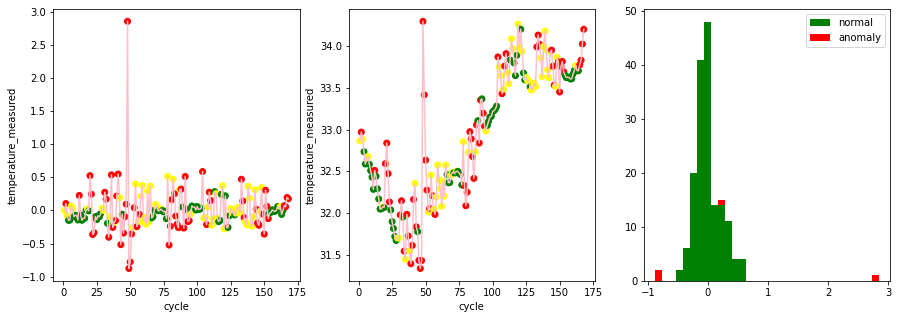



Plots for  B0006


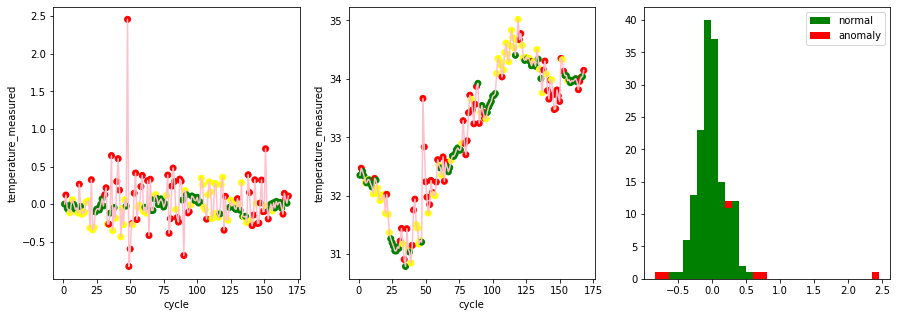



Plots for  B0007




Plots for  B0018


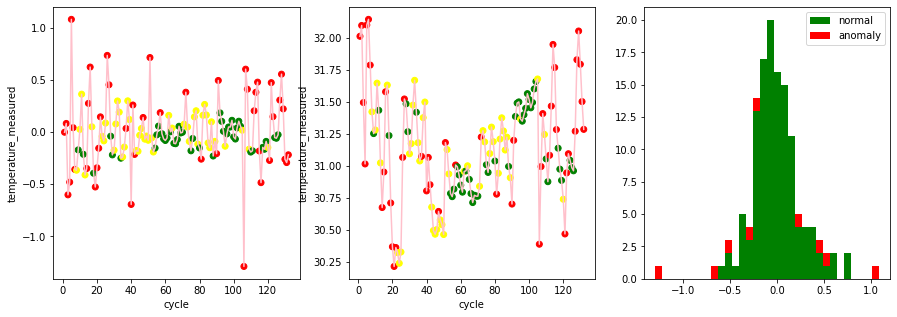

In [263]:
for i in data['cell'].unique():
    print('Plots for ',i)
    feat = 'temperature_measured'
    tmp = data[data['cell'] ==i]
    hmp = tmp.groupby('cycle').median().reset_index()
    cc = hmp[['cycle',feat]]
    feat1 = feat + '_org'
    cc[feat1] = cc[feat]
    cc[feat] = cc[feat].diff().fillna(0)
    min_max_scaler = StandardScaler()
    np_scaled = min_max_scaler.fit_transform(cc)
    dat = pd.DataFrame(np_scaled)
    model =  LocalOutlierFactor(n_neighbors=10,novelty=True)
    model.fit(dat)

    cc['anomaly'] = pd.Series(model.predict(dat))
    cc['score'] = pd.Series(model.decision_function(dat))
 
    cc['score'] = pd.qcut(cc['score'], 3,[3,2,1])
    

    cc['anomaly'] = cc['anomaly'].map( {1: 0, -1: 1} )
 

    fig, ax = plt.subplots(1,3,figsize=(15,5))

    ax[0].plot(cc['cycle'], cc[feat], color='pink')
    ax[0].scatter(cc['cycle'],cc[feat],c=cc['score'].map(colors))
    
    ax[0].set_xlabel('cycle')
    ax[0].set_ylabel(feat)
 
    a = cc.loc[cc['anomaly'] == 0, feat]
    b = cc.loc[cc['anomaly'] == 1, feat]
    
    ax[1].plot(cc['cycle'], cc[feat1], color='pink')
    colors = {3:'red',2:'yellow',1:'green'}
    ax[1].scatter(cc['cycle'],cc[feat1],c=cc['score'].map(colors))
    ax[1].set_xlabel('cycle')
    ax[1].set_ylabel(feat)
    
    
    ax[2].hist([a,b], bins=32, stacked=True, color=['green', 'red'], label = ['normal', 'anomaly'])
    
    plt.legend()
    plt.show()
    print()
    print()

<b> Isolation forest applied on mean voltage_load thorough cycles (after removing trend)</b>

Plots for  B0005


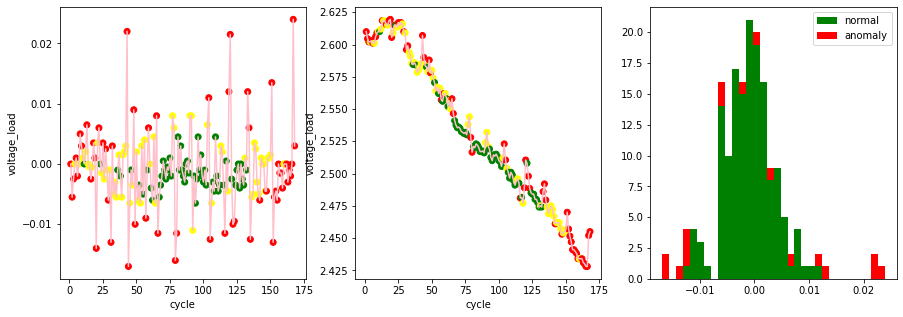



Plots for  B0006


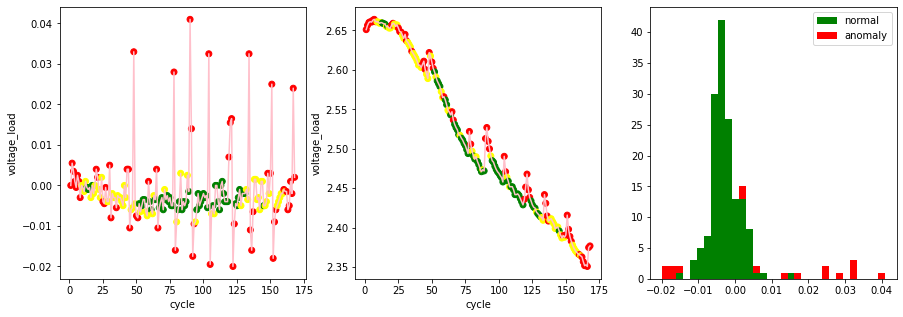



Plots for  B0007


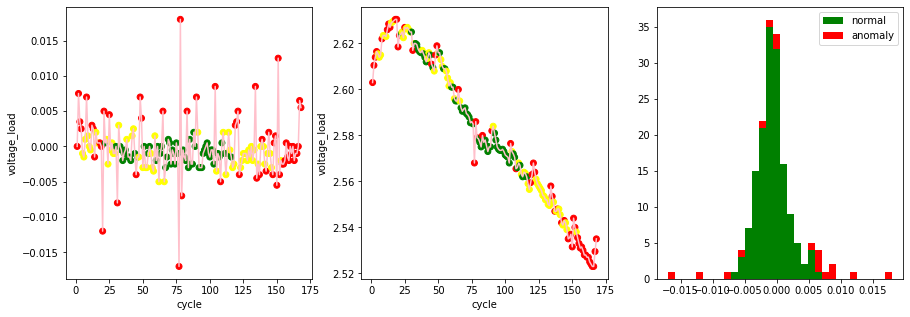



Plots for  B0018


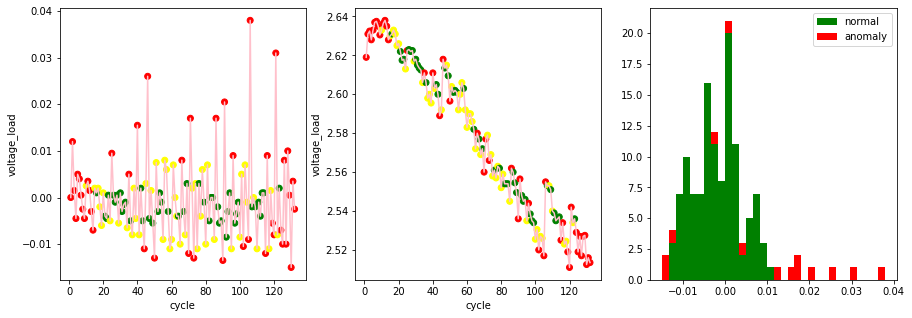

In [264]:
for i in data['cell'].unique():
    print('Plots for ',i)
    feat = 'voltage_load'
    tmp = data[data['cell'] ==i]
    hmp = tmp.groupby('cycle').median().reset_index()
    cc = hmp[['cycle',feat]]
    feat1 = feat + '_org'
    cc[feat1] = cc[feat]
    cc[feat] = cc[feat].diff().fillna(0)
    min_max_scaler = StandardScaler()
    np_scaled = min_max_scaler.fit_transform(cc)
    dat = pd.DataFrame(np_scaled)
    model =  IsolationForest(contamination=0.1)
    model.fit(dat)
    
    cc['anomaly'] = pd.Series(model.predict(dat))
    cc['score'] = pd.Series(model.decision_function(dat))
 
    cc['score'] = pd.qcut(cc['score'], 3,[3,2,1])
    

    cc['anomaly'] = cc['anomaly'].map( {1: 0, -1: 1} )
 

    fig, ax = plt.subplots(1,3,figsize=(15,5))

    ax[0].plot(cc['cycle'], cc[feat], color='pink')
    ax[0].scatter(cc['cycle'],cc[feat],c=cc['score'].map(colors))
    
    ax[0].set_xlabel('cycle')
    ax[0].set_ylabel(feat)
 
    a = cc.loc[cc['anomaly'] == 0, feat]
    b = cc.loc[cc['anomaly'] == 1, feat]
    
    ax[1].plot(cc['cycle'], cc[feat1], color='pink')
    colors = {3:'red',2:'yellow',1:'green'}
    ax[1].scatter(cc['cycle'],cc[feat1],c=cc['score'].map(colors))
    ax[1].set_xlabel('cycle')
    ax[1].set_ylabel(feat)
    
    
    ax[2].hist([a,b], bins=32, stacked=True, color=['green', 'red'], label = ['normal', 'anomaly'])
    
    plt.legend()
    plt.show()
    print()
    print()

<b> Local Outlier Factor applied on mean voltage_load thorough cycles (after removing trend)</b>

Plots for  B0005


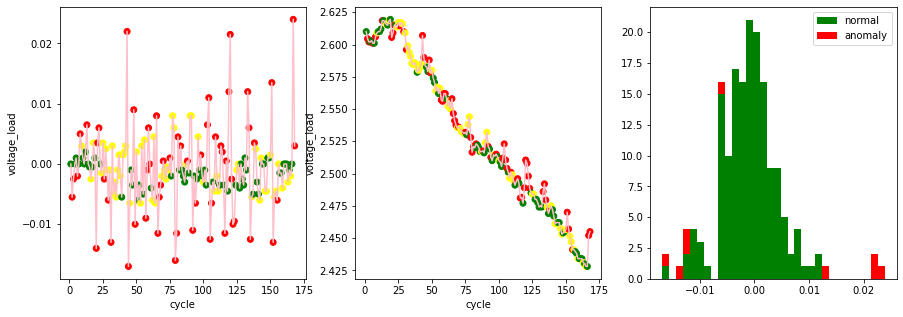



Plots for  B0006


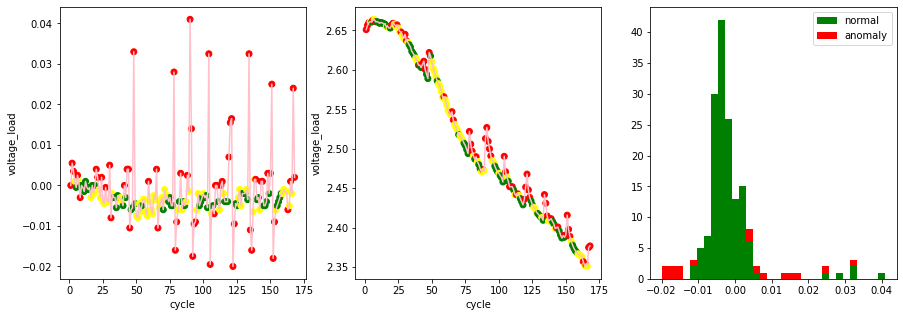



Plots for  B0007


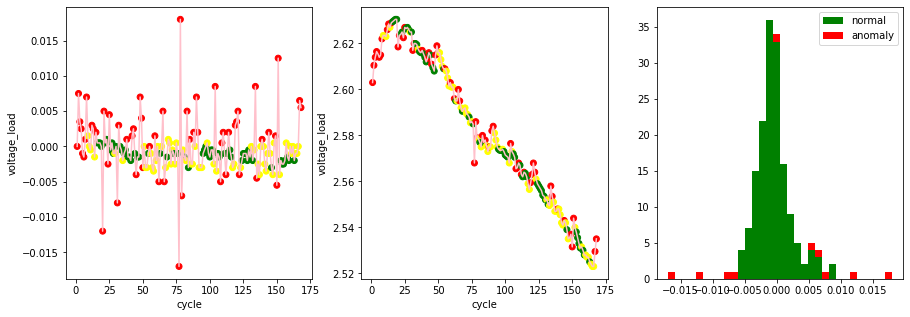



Plots for  B0018


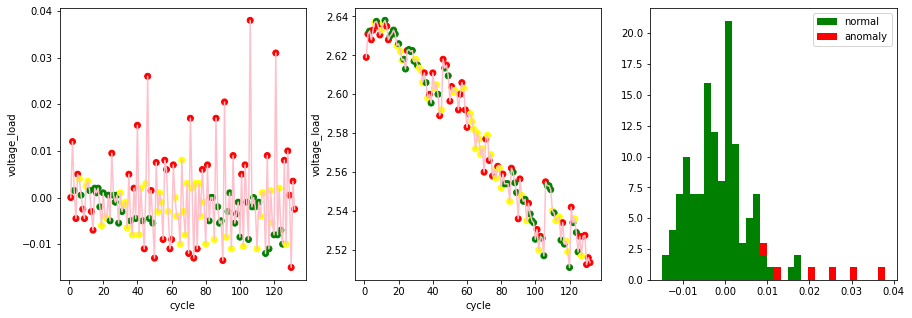

In [266]:
for i in data['cell'].unique():
    print('Plots for ',i)
    feat = 'voltage_load'
    tmp = data[data['cell'] ==i]
    hmp = tmp.groupby('cycle').median().reset_index()
    cc = hmp[['cycle',feat]]
    feat1 = feat + '_org'
    cc[feat1] = cc[feat]
    cc[feat] = cc[feat].diff().fillna(0)
    min_max_scaler = StandardScaler()
    np_scaled = min_max_scaler.fit_transform(cc)
    dat = pd.DataFrame(np_scaled)
    model =  LocalOutlierFactor(n_neighbors=10,novelty=True)
    model.fit(dat)

    cc['anomaly'] = pd.Series(model.predict(dat))
    cc['score'] = pd.Series(model.decision_function(dat))
 
    cc['score'] = pd.qcut(cc['score'], 3,[3,2,1])
    

    cc['anomaly'] = cc['anomaly'].map( {1: 0, -1: 1} )
 

    fig, ax = plt.subplots(1,3,figsize=(15,5))

    ax[0].plot(cc['cycle'], cc[feat], color='pink')
    ax[0].scatter(cc['cycle'],cc[feat],c=cc['score'].map(colors))
    
    ax[0].set_xlabel('cycle')
    ax[0].set_ylabel(feat)
 
    a = cc.loc[cc['anomaly'] == 0, feat]
    b = cc.loc[cc['anomaly'] == 1, feat]
    
    ax[1].plot(cc['cycle'], cc[feat1], color='pink')
    colors = {3:'red',2:'yellow',1:'green'}
    ax[1].scatter(cc['cycle'],cc[feat1],c=cc['score'].map(colors))
    ax[1].set_xlabel('cycle')
    ax[1].set_ylabel(feat)
    
    
    ax[2].hist([a,b], bins=32, stacked=True, color=['green', 'red'], label = ['normal', 'anomaly'])
    
    plt.legend()
    plt.show()
    print()
    print()

<div style="display:fill;
           border-radius:5px;
           background-color:#b7ff93;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:black;font-size:120%;"> 
    Summary
    </p>
    <p style="padding: 10px;
              color:black;"> 
    <ul>  
        <li>Local Outlier Factor, Isolation trees and Elliptical Envelope all seems to be performing better at finding  anamolies.
                <br>
            <li> All algorithms are able to find sudden peaks and drops in the values of variables, which can help us to find out if a cell is going through some rare issues.
    </ul>
        </p>
    </div>

<b> Helper Code for creating .csv files from .mat files</b>

In [245]:

def load_data(nm,battery): # Example of input load_data('B0006.mat','B0006')
  mat = loadmat( nm)
  #print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge' :
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]






###########################################################
************************* My Code *************************

path = "/content/drive/MyDrive/"


files = ["B0005.mat","B0006.mat","B0007.mat","B0018.mat"]

dfs = []

for i in files:
  df = load_data(path + i,i.split('.')[0])[0]
  df['cell'] = i.split('.')[0]
  dfs.append(df)


df = pd.concat(dfs)

df.to_csv('/content/sample_data/dataset_tech_mahindra.csv')

SyntaxError: invalid syntax (40117640.py, line 48)

<div style="display:fill;
           border-radius:5px;
           background-color:#b7ff93;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:black;font-size:120%;"> 
    Insights
    </p>
    <p style="padding: 10px;
              color:black;"> 
    <ul>  
        <li>Time of cycle for latter cycles is hiigh as compared to first cycle.
                <br>
        <li>Capacity seems to be decreasing with time with increase in time of cycle.
            <br>
                <li>Levels of Current measured from battery is not changing with increase in time of cycle.
                    <br>
        <li>Discharge time for batteries increase with time.
                <br>
          <li>Levels of voltage measured from battery is not changing with increase in time of cycle.
                    <br>
              <li>AVG cycle discharge time from battery is increasing with time.
                    <br>
        <li>For Batteries B0005 and B0006 temperature peak is increasing with time, while for batteries B0007 and B0018 temperature peak is not changing with time.
    </ul>
        </p>
    </div>

<div style="display:fill;
           border-radius:5px;
           background-color:#b7ff93;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:black;font-size:120%;"> 
    Recommendations
    </p>
    <p style="padding: 10px;
              color:black;"> 
    <ul>  
        <li>B0018 seems to better in loong term as it gives consistent current at longer cycles without causing overheating.
                <br>
        <li>B0018, B007 have longest discharge cycle.
            </ul>
        </p>
    </div>